<a href="https://colab.research.google.com/github/soohyunme/Foreigner_speech/blob/main/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install efficientnet_pytorch
!pip install git+https://github.com/cmpark0126/pytorch-polynomial-lr-decay.git
!pip install SpeechRecognition

  Cloning https://github.com/cmpark0126/pytorch-polynomial-lr-decay.git to /tmp/pip-req-build-695o8s8z
  Running command git clone -q https://github.com/cmpark0126/pytorch-polynomial-lr-decay.git /tmp/pip-req-build-695o8s8z


In [34]:
import datetime
import warnings
warnings.filterwarnings('ignore')

import os
import math
import time
import random
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob

from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold

import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn import functional as F
from torchvision import models
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from efficientnet_pytorch import EfficientNet
from torch_poly_lr_decay import PolynomialLRDecay

import speech_recognition as sr

In [35]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2'
torch.set_num_threads(8)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [38]:
train_paths = glob("/content/drive/MyDrive/03.foreigner_speech/dataset/train/wav/*.wav")
test_paths = glob("/content/drive/MyDrive/03.foreigner_speech/dataset/test/*.wav")


### Google STT 확인

In [15]:
r = sr.Recognizer()

In [56]:
sample_file = '/content/drive/MyDrive/03.foreigner_speech/dataset/train/wav/EX12RC043_EX0101_20210829.wav'
sample_meta = '/content/drive/MyDrive/03.foreigner_speech/dataset/train/meta/EX12RC043_EX0101_20210829_SW076.json'

In [57]:
from pprint import pprint 
import json
with open(sample_meta) as data_file:
  local = json.load(data_file)

In [68]:
label = local['transcription'].copy()

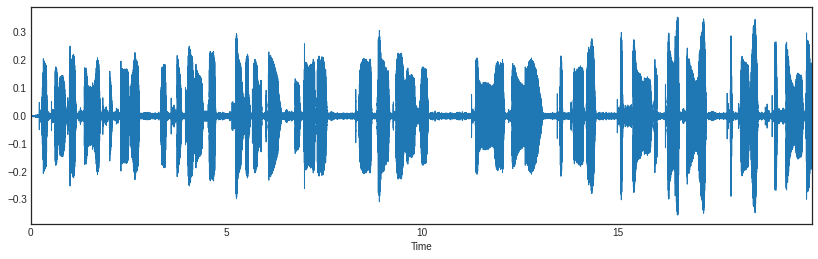

In [69]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(14,4))
data, rate = librosa.load(sample_file)

librosa.display.waveplot(data, sr=rate)

ipd.Audio(data,rate=rate)

In [70]:
label

{'AnswerLabelText': '',
 'Question': '',
 'Reading': '배부르게 저녁 식사를 마치고 나서, 친구들과 수다를 더 떨기 위해 건너편의 카페로 갔습니다.',
 'ReadingLabelText': '배부르게 저녁 식사를 마치고 나서 친구들과 수다를 더 떨기 위해 건너편의 카페로 갔습니다',
 'SentenceSpeechLV': '중'}

In [71]:
data_audio = sr.AudioFile(file_path)

with data_audio as source:
  audio = r.record(source)
r.recognize_google(audio_data=audio,language='ko_KR')

'배부르게 저녁 식사를 마치고 나서 친구들과 수다를 더 딸기 위해 건너편에 카페로 같습니다 편해 카페로 갔습니다'